In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import math
import pylab
import random

# 02 Функции для проведения исследования


In [2]:
# Напишем функцию для определения ТЕОРИТИЧЕСКОЙ плотности экспоненциального распределения случайной величины, 
# с входными параметрами:
    # l (lambda) - параметр распределения сл.вел. (0,0125)
    # x - значение из диапазона "иксовых значений" (используем длину масива выборочных значений, то есть 1000 значений)
def eps_pdf(l, x):
    return (l * math.exp(-l * x))


# напишем функцию формирования выборки из 1000 случайных значений с входными параметрами:
    # value - количество случайных значений (у нас оно будет = 1000)
    # l (lambda) - параметр распределения сл.вел. (0,0125)
    # n - объем выборки (то есть количество раз выбора случайного числа)
def sample_expon(value, l, n):
    mu = 1/l
    list_x = []
    for i in range(value):
        summa = 0
        for j in range(n):
            summa += mu**2*random.expovariate(mu)
        list_x.append(summa/n)
    return list_x

# напишем функцию для формирования начальной таблицы 
def frame_start(l):
    frame = pd.DataFrame({
        'Распределение':'Исходное',
        'Мат. ожидание':1/l, 
        'Дисперсия':(math.sqrt(1/l**2))**2, 
        'Стандарт. откл-е':math.sqrt(1/l**2),
        'Мат. ожидание (откл-е)':'NaN',
        'Мат. ожидание (откл-е, %)':'NaN',
        'Дисперсия (откл-е)':'NaN',
        'Дисперсия (откл-е, %)':'NaN',
        'Стандарт. откл-е (откл-е)':'NaN',
        'Стандарт. откл-е (откл-е, %)':'NaN'
    }, index = [0])
    return frame

# напишем функцию для дополнения таблицы новой строкой I
def frame_conte(n, list_x):
    new_line = {
                'Распределение':'Выборочное',
                'Объем выборки':n, 
                'Мат. ожидание':round(np.mean(list_x),3),
                'Дисперсия':round(np.var(list_x),3),
                'Стандарт. откл-е':round(np.std(list_x),3)}
    return new_line

# напишем функцию для заполнения расчетных показателей первого порядка таблицы строки I
def frame_conte_dif_1(frame, n):
    i = frame.index[-1]
    frame['Мат. ожидание (откл-е)'].iloc[i] = (frame['Мат. ожидание'].iloc[i] - frame['Мат. ожидание'].iloc[0])
    frame['Дисперсия (откл-е)'].iloc[i] = frame['Дисперсия'].iloc[i] - frame['Дисперсия'].iloc[0]/n
    frame['Стандарт. откл-е (откл-е)'].iloc[i] = (
        frame['Стандарт. откл-е'].iloc[i] - frame['Мат. ожидание'].iloc[0]/((frame['Объем выборки'].iloc[i])**0.5))

# напишем функцию для заполнения расчетных показателей второго порядка таблицы строки I
def frame_conte_dif_2(frame): 
    i = frame.index[-1]
    frame['Мат. ожидание (откл-е, %)'].iloc[i] = round(100*(
        frame['Мат. ожидание (откл-е)'].iloc[i] / frame['Мат. ожидание'].iloc[0]),3)
    frame['Дисперсия (откл-е, %)'].iloc[i] = round(100*(
        frame['Дисперсия (откл-е)'].iloc[i] / (frame['Дисперсия'].iloc[0]/frame['Объем выборки'].iloc[i])),3)
    frame['Стандарт. откл-е (откл-е, %)'].iloc[i] = round(float(100*(
        frame['Стандарт. откл-е (откл-е)'].iloc[i] / (
            frame['Мат. ожидание'].iloc[0]/((frame['Объем выборки'].iloc[i])**0.5)))),3)
    

# напишем функцию для определения теоритической плотности соответствующего (выборке) нормального распределения
def normal_pdf(x, mu, sigma):
    sqrt_two_pi = math.sqrt(2 * math.pi)
    return (math.exp(-(x-mu) ** 2 / 2 / sigma ** 2)/(sqrt_two_pi * sigma)) 

# формируем гистограмму выборки и график плотности соответствующего нормального распределения
# развивая логику примера с прибором, который обычно работает без отказа 80 часов, по оси икс укажем удиницы измерения - часы
def graph_sample_theory(list_x):
#   гистограмма выборки
    fig, axes = plt.subplots(figsize=(8,4), dpi=80)
    plt.hist(list_x,bins = 'auto', color='purple',density = True)
    plt.xlabel('Hours')
    plt.ylabel('Value')

#   график плотности
    axes.set_xlim([0,150])
    axes.set_ylim([0,0.12])
    plt.plot(sorted(list_x),[normal_pdf(x, np.mean(list_x), np.std(list_x)) for x in sorted(list_x)], color='green', lw=4)
    plt.xlabel('Hours')
    plt.ylabel('Probability')
    plt.show()

# 03 Теоритическая плотность экпоненциального распределения¶
Используем нашу самописную формулу и построим графическое отображение плотности распределения

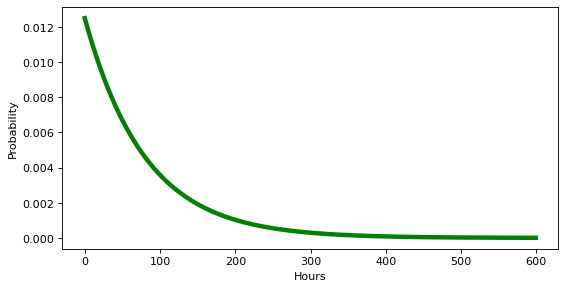

Параметры исходного экспоненционального распределения
   Мат. ожидание  Дисперсия  Стандарт. откл-е
0           80.0     6400.0              80.0


In [3]:
# зададим параметр распределения
l = 0.0125

# сформируем диапазон "иксовых" и "игрековых" значений
list_xt = range(600)
list_yt = [eps_pdf(l, x = i) for i in list_xt]

# сформируем график
# развивая логику примера с прибором, который работает без отказа 80 часов, по оси икс укажем удиницы измерения - часы
fig, axes = plt.subplots(figsize=(8,4), dpi=80)
plt.plot(list_xt, list_yt, color='g', lw=4)
plt.xlabel('Hours')
plt.ylabel('Probability')
plt.show()

# создаем нулевую таблицу (или обновляем таблицу)
frame = pd.DataFrame({'Create new frame':'yes'}, index = [0])

# представим параметры распределения в виде таблицы
print ('\033[1m' + '\033[4m' + "Параметры исходного экспоненционального распределения" + '\033[0m')
frame = frame_start(l)
print( frame[['Мат. ожидание', 'Дисперсия', 'Стандарт. откл-е']])

# 04 Формирование 1000 выборочных независимых случайных величин
В этом блоке мы сформируем выборку из 1000 значений, случайным образом отобранных из экспоненциального распределения

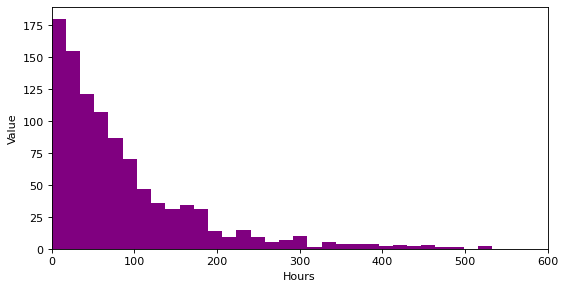

Параметры первой выборки
   Мат. ожидание  Дисперсия  Стандарт. откл-е
1         85.201   7647.619            87.451


D:\Program Files\Anaconda\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [4]:
# зададим параметры выборки
value = 1000
n = 1

# сформируем выборку
list_x = sample_expon(value, l, n)
  
# формируем гистограмму выборки
# развивая логику примера с прибором, который обычно работает без отказа 80 часов, по оси икс укажем удиницы измерения - часы
fig, axes = plt.subplots(figsize=(8,4), dpi=80)
axes.set_xlim([0,600])
plt.hist(list_x,bins = 'auto', color='purple')
plt.xlabel('Hours')
plt.ylabel('Value')
plt.show()

# занесём ПЕРВИЧНЫЕ результаты (параметры) выборки в таблицу
# определяемые параметры: ср.мат.ожидание, дисперсия, станд.отклонение

for i in range(n):
    frame = frame.append(frame_conte(n, list_x), ignore_index=True)
    frame_conte_dif_1(frame, n)
    frame_conte_dif_2(frame)
print( '\033[1m' + '\033[4m' + 'Параметры первой выборки'  + '\033[0m')

print (frame.loc[[1],['Мат. ожидание', 'Дисперсия', 'Стандарт. откл-е']])

# 05 Сопоставление выборки и исходной совокупности
Выборка случайной величины 1000 раз в соответствии с законом экспоненциального распределения достаточно хорошо характеризует теоретическую (исходную) совокупность. Что явно прослеживается на графиках

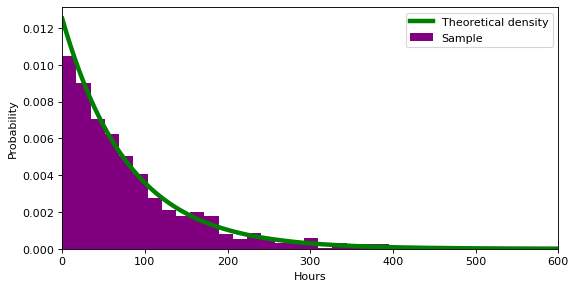

  Распределение  Мат. ожидание  Дисперсия  Стандарт. откл-е
0      Исходное         80.000   6400.000            80.000
1    Выборочное         85.201   7647.619            87.451


In [5]:

fig, axes = plt.subplots(figsize=(8,4), dpi=80)
plt.hist(list_x, bins = 'auto', color='purple', density = True, label='Sample')
plt.xlabel('Mean')
plt.ylabel('Value')

axes.set_xlim([0,600])
plt.plot(list_xt, list_yt, label='Theoretical density', color='g', linestyle='-', lw=4)
plt.xlabel('Hours')
plt.ylabel('Probability')
plt.legend()
plt.show()

print (frame.loc[[0,1],['Распределение','Мат. ожидание', 'Дисперсия', 'Стандарт. откл-е']])

# 06 Количество исследований
Предусмотрим в работе возможность проводить испытания с заданным объемом выборки по несколько раз. По умолчанию испытания проводятся по 1 разу, но особо любознательные могут провести 2,3,4,5 или более раз

In [6]:
# укажем количество исследований
w = 1

# 07 Объем выборок¶
Определим объем выборок, то есть сколько раз каждое значение из тысячи выборочных будет определено для целей определения среднего арифметического и в последующем занесено в выборку

In [7]:
choice = (5,50,100,150,300,500)

# 08 Выборки из экспоненциального распределения
В этом блоке сформируем выборки из 1000 случайных значений, где каждое значение будет определено указанное выше количество раз (по умолчанию: 15, 50, 100, 150, 300, 500).

Результаты представим в виде графиков-гистограмм и таблиц. Поверх каждого графика-гистограммы нарисуем график плотности соответствующего нормального распределения.

In [11]:
# for n in (choice):
    for i in range(w):
        list_x = sample_expon(value, l, n)
        print( '\033[4m' + 'Объем выборки:', '\033[1m', n, '\033[0m') 
        graph_sample_theory(list_x)
        frame = frame.append(frame_conte(n, list_x), ignore_index=True)
        frame_conte_dif_1(frame, n)
        frame_conte_dif_2(frame)

    
print('\033[1m' + '\033[4m' + 'Параметры выборок объемом: ', choice, '\033[0m')
i = range(frame.index[-1]+1)
i = i[2:]
print (frame.loc[i,['Распределение','Объем выборки','Мат. ожидание', 'Дисперсия', 'Стандарт. откл-е']])

IndentationError: unexpected indent (<ipython-input-11-546e639885fc>, line 2)

# Выводы

Во-первых, выборочное среднее действительно, с увеличением выборки приближается к математическому ожиданию нормального распределения (т.е. к 80-ти), но при объеме выборки более $n &gt; 100$ эффект от объема не шибко впечатляет: выборочное среднее далеко не всегда приближается к теоретическому значению равному 80.

Во-вторых, что касается параметров дисперсии и стандартного отклонения, так здесь вообще не видно никакой аппроксимации, то есть, вероятно мы (опять конечно же я) ошибочно полагали, что при увеличении выборки, отклонение выборочных параметров будет уменьшаться от расчетных теоретических. С другой стороны, на то оно и исследование, чтобы подтверждать или опровергать предположения.

